return all_train_losses, all_train_accuracies, all_test_losses, all_test_accuracies

# load logs

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/tmp/logsconcat5.pkl', 'rb') as file:
        logsconcat5 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logsconcat10.pkl', 'rb') as file:
        logsconcat10 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logsconcat32.pkl', 'rb') as file:
        logsconcat32 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logssq1.pkl', 'rb') as file:
        logssq1 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logssq5.pkl', 'rb') as file:
        logssq5 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logssq32.pkl', 'rb') as file:
        logssq32 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logssq100.pkl', 'rb') as file:
        logssq100 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logssq200.pkl', 'rb') as file:
        logssq200 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logssq300.pkl', 'rb') as file:
        logssq300 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logsef1.pkl', 'rb') as file:
        logsef1 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logsef5.pkl', 'rb') as file:
        logsef5 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logsef32.pkl', 'rb') as file:
        logsef32 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logsef100.pkl', 'rb') as file:
        logsef100 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logsef200.pkl', 'rb') as file:
        logsef200 = pickle.load(file)

with open('/content/drive/MyDrive/tmp/logsef300.pkl', 'rb') as file:
        logsef300 = pickle.load(file)

# select among logs

In [ ]:
import numpy as np

In [ ]:
def select_best_run_final_epoch(logs, is_loss=True):
    selected_runs = []
    for log in logs:
        # Choose the run with the minimum/maximum value in the last epoch
        best_run_index = np.argmin([run[-1] for run in log]) if is_loss else np.argmax([run[-1] for run in log])
        selected_runs.append(log[best_run_index])
    return selected_runs


In [ ]:
def select_best_run_overall(logs_train, logs_test, is_loss=True):
    selected_runs_train = []
    selected_runs_test = []
    for log, train_log in zip(logs_test, logs_train):
        # Choose the run with the minimum/maximum average value based on test logs
        best_run_index = np.argmin([np.mean(run) for run in log]) if is_loss else np.argmax([np.mean(run) for run in log])
        selected_runs_test.append(log[best_run_index])
        selected_runs_train.append(train_log[best_run_index])
        print(f'train was {len(train_log[best_run_index])}')
        print(f'acc was was {(log[best_run_index][-1])}')
    return selected_runs_test, selected_runs_train


In [ ]:
def mean_performance(logs):
    mean_runs = []
    for log in logs:
        mean_run = np.mean(log, axis=0)  # Average over runs
        mean_runs.append(mean_run)
    return mean_runs


# plot

In [ ]:
logs_train_acc = [logssq1[1], logssq5[1], logssq32[1], logssq100[1], logssq200[1], logssq300[1],
                   logsef1[1], logsef5[1], logsef32[1], logsef100[1], logsef200[1], logsef300[1],
                   logsconcat5[1], logsconcat10[1], logsconcat32[1]
                   ]


logs_test_acc = [logssq1[3], logssq5[3], logssq32[3], logssq100[3], logssq200[3], logssq300[3],
                   logsef1[3], logsef5[3], logsef32[3], logsef100[3], logsef200[3], logsef300[3],
                   logsconcat5[3], logsconcat10[3], logsconcat32[3]
                   ]

logs_exp_names = ['logssq1', 'logssq5','logssq32', 'logssq100','logssq200', 'logssq300',
                  'logsef1', 'logsef5','logsef32', 'logsef100','logsef200', 'logsef300',
                  'logsconcat5', 'logsconcat10','logsconcat32',
                  ]
logs_exp_marker = ['.', 'p','o', 'x','v', '<',
                   '.', 'p','o', 'x','v', '<',
                   '.', 'p','o'
                   ]

best_overall_runs_test, best_overall_runs_train = select_best_run_overall(logs_train_acc,logs_test_acc, is_loss=False)

train was 14
acc was was 0.27875
train was 26
acc was was 0.7375
train was 40
acc was was 0.8975
train was 31
acc was was 0.92375
train was 40
acc was was 0.93375
train was 35
acc was was 0.94125
train was 21
acc was was 0.3675
train was 22
acc was was 0.7275
train was 28
acc was was 0.93125
train was 39
acc was was 0.9425
train was 23
acc was was 0.94
train was 24
acc was was 0.94875
train was 24
acc was was 0.63875
train was 38
acc was was 0.79375
train was 26
acc was was 0.9025


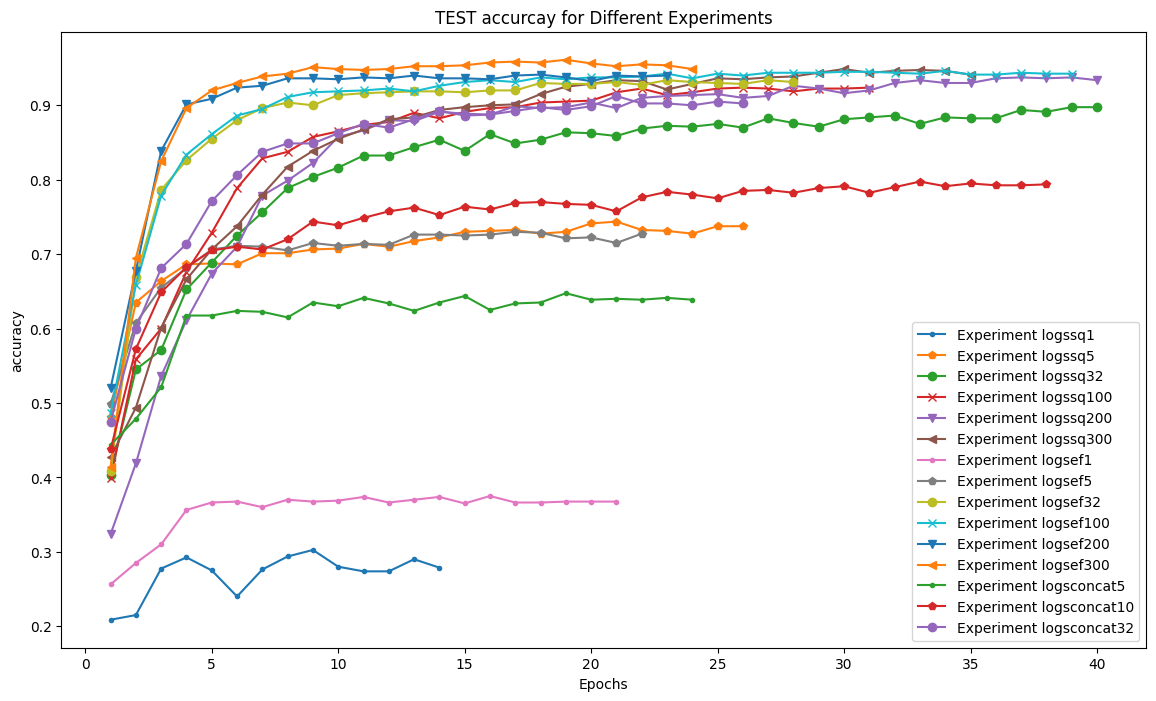

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 8))
for i, run_loss in enumerate(best_overall_runs_test):
    epochs = range(1, len(run_loss) + 1)
    plt.plot(epochs, run_loss, label=f'Experiment {logs_exp_names[i]}', marker=f'{logs_exp_marker[i]}')

plt.title('TEST accurcay for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


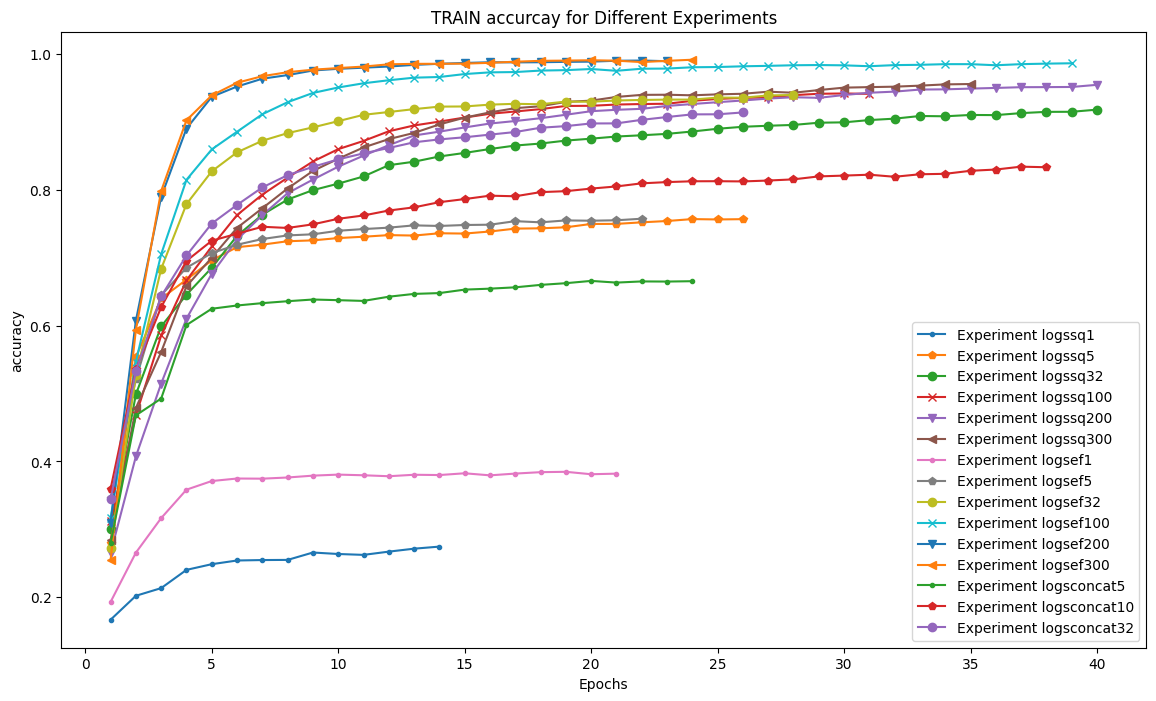

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 8))
for i, run_loss in enumerate(best_overall_runs_train):
    epochs = range(1, len(run_loss) + 1)
    plt.plot(epochs, run_loss, label=f'Experiment {logs_exp_names[i]}', marker=f'{logs_exp_marker[i]}')

plt.title('TRAIN accurcay for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
